In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
eye_cascade = cv2.CascadeClassifier("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/Got snapchat filter/third-party/frontalEyes35x16.xml")
mustach_cascade = cv2.CascadeClassifier("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/Got snapchat filter/third-party/Nose18x15.xml")

glasses = cv2.imread("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/Got snapchat filter/glasses.png",cv2.IMREAD_UNCHANGED)
moochh = cv2.imread("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/Got snapchat filter/mustache.png",cv2.IMREAD_UNCHANGED)

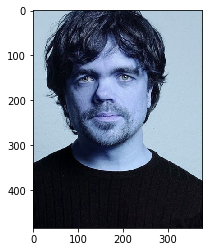

In [43]:
frame = cv2.imread("C:/Users/ASUS/Desktop/p/ML/ML/Dataset/Got snapchat filter/Before.png")   

plt.imshow(frame)


In [44]:
eyes = eye_cascade.detectMultiScale(frame,1.3,5)
noses = mustach_cascade.detectMultiScale(frame,1.3,5)
print(noses)

[[125 167  51  61]]


65 108 99 160


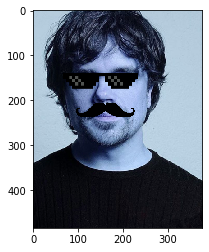

In [53]:
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
for eye in eyes:
    x1,y1,w1,h1 = eye
    x1 = x1-30
    y1 = y1-10
    w1 = w1+40
    h1 = h1+30
    print(x1,y1,w1,h1)
    h1 +=10
    glasses = cv2.resize(glasses,(h1,w1))
    y2 = y1 + glasses.shape[0]
    x2 = x1 + glasses.shape[1]
    alpha_s = glasses[:,:,3] / 255.0
    alpha_l = 1.0 - alpha_s   
    for c in range(0, 3):
        frame[y1:y2, x1:x2, c] =  alpha_s*glasses[:, :, c] +alpha_l*frame[y1:y2, x1:x2, c]

for nose in noses:
    x1,y1,w1,h1 = nose
    x1 = x1-30
    y1 = y1+25
    w1 = w1+80
    h1 = h1
    
    moochh = cv2.resize(moochh,(w1,h1))
    y2 = y1 + moochh.shape[0]
    x2 = x1 + moochh.shape[1]
    alpha_s = moochh[:,:,3] / 255.0
    alpha_l = 1.0 - alpha_s   
    for c in range(0, 3):
        frame[y1:y2, x1:x2, c] =  alpha_s*moochh[:, :, c] +alpha_l*frame[y1:y2, x1:x2, c]
    

    plt.imshow(frame)

    
    
cv2.waitKey(0)
cv2.destroyAllWindows()


In [54]:
a = frame[:,:,0].flatten()
b = frame[:,:,1].flatten()
c = frame[:,:,2].flatten()

print(a.shape)


(182845,)


In [55]:
y =  pd.DataFrame(data=a,columns=["Channel 1"]) 
y.to_csv("snapchata.csv",index = False)

In [56]:
y =  pd.DataFrame(data=b,columns=["Channel 2"]) 
y.to_csv("snapchatb.csv",index = False)

In [57]:
y =  pd.DataFrame(data=c,columns=["Channel 3"]) 
y.to_csv("snapchatc.csv",index = False)